In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

PATH_TO_PHOTO = '/Users/dominikocsofszki/Downloads/labme 2022-12-01 at 14.04.34.png'

path_to_photo = Path(PATH_TO_PHOTO)
name = path_to_photo.stem
image = plt.imread(str(path_to_photo))
# img = cv2.imread('/Users/dominikocsofszki/Downloads/labme 2022-12-01 at 14.04.34.png')

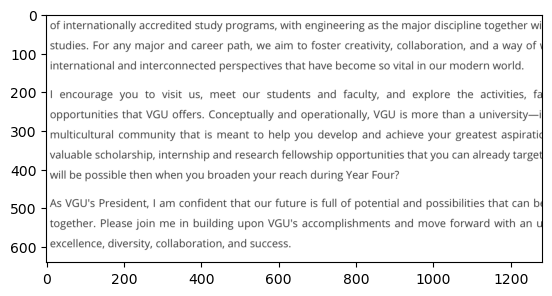

In [21]:
plt.imshow(image)

In [34]:
h,w,_ = image.shape
middle_pixel_size_x2 = 10
print(h,w,_)
h_half = int (h/2)
w_half = int(w/2)
image_crop_l = image[: , 0 : w_half ,:]
image_crop_r = image[: , w_half : w ,:]
image_crop_m = image[: ,
               w_half-middle_pixel_size_x2:w_half+middle_pixel_size_x2,
               :  ]
# image_cropp_r = image[h/2:h,0:w/2,:]

640 1282 4


In [69]:
# def change_saving_folder(Path(path_to_photo)) :
def return_path_names_image_txt(path_to_photo) :
    path_to_photo_new = Path(path_to_photo)
    name = path_to_photo_new.stem
    l = path_to_photo_new.with_stem(name+'_l')
    r = path_to_photo_new.with_stem(name+'_r')
    m = path_to_photo_new.with_stem(name+'_m')
    l_txt = l.with_suffix('.txt')
    r_txt = r.with_suffix('.txt')
    m_txt = m.with_suffix('.txt')
    return l,r,m,l_txt,r_txt,m_txt
l,r,m,l_txt,r_txt,m_txt = return_path_names_image_txt('/Users/dominikocsofszki/Desktop/ts3/valid/images/5_png_jpg.rf.0c99e29b8f79845ea9423beb3f86aaf4.jpg')
print(l,r,m,l_txt,r_txt,m_txt)

/Users/dominikocsofszki/Desktop/ts3/valid/images/5_png_jpg.rf.0c99e29b8f79845ea9423beb3f86aaf4_l.jpg /Users/dominikocsofszki/Desktop/ts3/valid/images/5_png_jpg.rf.0c99e29b8f79845ea9423beb3f86aaf4_r.jpg /Users/dominikocsofszki/Desktop/ts3/valid/images/5_png_jpg.rf.0c99e29b8f79845ea9423beb3f86aaf4_m.jpg /Users/dominikocsofszki/Desktop/ts3/valid/images/5_png_jpg.rf.0c99e29b8f79845ea9423beb3f86aaf4_l.txt /Users/dominikocsofszki/Desktop/ts3/valid/images/5_png_jpg.rf.0c99e29b8f79845ea9423beb3f86aaf4_r.txt /Users/dominikocsofszki/Desktop/ts3/valid/images/5_png_jpg.rf.0c99e29b8f79845ea9423beb3f86aaf4_m.txt


In [122]:
def crop_image_lrm_midx2(path_to_photo) :
    image = plt.imread(str(path_to_photo))
    # image = plt.imread(path_to_photo)

    h,w,_ = image.shape
    MIDDLE_PIXEL_SIZE_X2 = 10
    print(h,w,_)
    h_half = int (h/2)
    w_half = int(w/2)
    image_crop_l = image[: , 0 : w_half ,:]
    image_crop_r = image[: , w_half : w ,:]
    image_crop_m = image[: ,
               w_half-MIDDLE_PIXEL_SIZE_X2:w_half+MIDDLE_PIXEL_SIZE_X2,
               :  ]
    return image_crop_l,image_crop_r,image_crop_m

In [123]:
# test_path = '/Users/dominikocsofszki/Desktop/ts3/valid/images/5_png_jpg.rf.0c99e29b8f79845ea9423beb3f86aaf4.jpg'
test_path = '/Users/dominikocsofszki/Desktop/ts3/testing/labme 2022-12-01 at 14.04.34.png'
def save_cropped_images(path_to_photo) :
    l,r,m,_,_,_= return_path_names_image_txt(path_to_photo)
    image_crop_l,image_crop_r,image_crop_m = crop_image_lrm_midx2(path_to_photo)
    plt.imsave(l,image_crop_l)
    plt.imsave(r,image_crop_r)
    plt.imsave(m,image_crop_m)
save_cropped_images(test_path)

640 1282 4


In [129]:
def read_csv_new_header(csv_txt_path) :
    # df = pd.read_csv(csv_txt_path, names=['class_nr','center_h','center_w','h','w'])
    # df = pd.read_csv(csv_txt_path, names=('class_nr','center_h','center_w','h','w'))
    df = pd.read_csv(csv_txt_path,header=None,names=['class_nr','center_h','center_w','h','w'])
    return df
def calc_final_labels(path_to_photo) :
        l,r,m,l_txt,r_txt,m_txt= return_path_names_image_txt(path_to_photo)
        # df_r = pd.read_csv(r_txt)
        df_r = pd.read_csv_new_header(r_txt)
        w_of_l_image = l.shape()[1]
        df_r['center_w'] = (df_r['center_w']/2) + 0.5


In [136]:
def calc_label_right(df) :
    # df = pd.read_csv('asdasdad')
        # w_of_l_image = l.shape()[1]
        # df['center_w'] = ((df['center_w']/2) + 0.5)  ## apply could be use
        # print(df['center_w'])
        print(df['center_w'].iloc[0])

        df['center_w'] = (((df['center_w'])/2) + 1)  ## apply could be use

        print(df.columns)
        return df
df = read_csv_new_header('/home/ngoc/Documents/third-yr-in-uni/project-yolo/labelme/runs/detect_18/labels/labme 2022-12-04 at 08.17.13.txt')
# print(df.columns)
print(df)
print(calc_label_right(df))

                           class_nr  center_h  center_w   h   w
0    60 0.35 0.764844 0.7 0.0265625       NaN       NaN NaN NaN
1   59 0.425 0.0453125 0.45 0.03125       NaN       NaN NaN NaN
2  58 0.625 0.846094 0.65 0.0296875       NaN       NaN NaN NaN
3      44 0.3 0.326562 0.6 0.028125       NaN       NaN NaN NaN
4  38 0.325 0.652344 0.65 0.0265625       NaN       NaN NaN NaN
5     47 0.3 0.207031 0.6 0.0328125       NaN       NaN NaN NaN
nan
Index(['class_nr', 'center_h', 'center_w', 'h', 'w'], dtype='object')
                           class_nr  center_h  center_w   h   w
0    60 0.35 0.764844 0.7 0.0265625       NaN       NaN NaN NaN
1   59 0.425 0.0453125 0.45 0.03125       NaN       NaN NaN NaN
2  58 0.625 0.846094 0.65 0.0296875       NaN       NaN NaN NaN
3      44 0.3 0.326562 0.6 0.028125       NaN       NaN NaN NaN
4  38 0.325 0.652344 0.65 0.0265625       NaN       NaN NaN NaN
5     47 0.3 0.207031 0.6 0.0328125       NaN       NaN NaN NaN
